In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [67]:
data=pd.read_csv("export1.csv")

In [68]:
data

,place,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Food and Culture
0,Jim Corbett National Park,50,70,80,0,50,0,85
1,Mussoorie,90,100,60,10,90,50,100
2,Nainital,95,90,65,67,91,49,100
3,Almora,55,91,71,72,90,52,97
4,Auli,97,60,81,9,11,94,75
...,...,...,...,...,...,...,...,...
167,Shri Siddhbali dham,20,38,40,60,77,9,95
168,Kartik Swami,15,15,75,80,80,15,52
169,Panwali Kantha,65,20,89,91,55,94,0
170,Robber's Cave,60,74,75,0,9,0,80


In [69]:
data.place

0      Jim Corbett National Park
1                      Mussoorie
2                       Nainital
3                         Almora
4                           Auli
                 ...            
167          Shri Siddhbali dham
168                 Kartik Swami
169               Panwali Kantha
170                Robber's Cave
171           Khatling Cave/Trek
Name: place, Length: 172, dtype: object

In [70]:
d=data.iloc[0:172,1:8]

In [71]:
d

,Adventure,Recreation,Beauty,Pilgrim,History,Trekcamp,Food and Culture
0,50,70,80,0,50,0,85
1,90,100,60,10,90,50,100
2,95,90,65,67,91,49,100
3,55,91,71,72,90,52,97
4,97,60,81,9,11,94,75
...,...,...,...,...,...,...,...
167,20,38,40,60,77,9,95
168,15,15,75,80,80,15,52
169,65,20,89,91,55,94,0
170,60,74,75,0,9,0,80


In [72]:
import seaborn as sns

<AxesSubplot:>

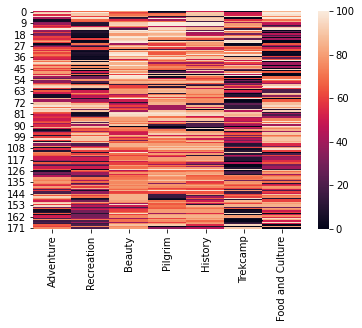

In [73]:
sns.heatmap(d)

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
cosine = cosine_similarity(d.values, d.values)

In [76]:
cosine

array([[1.        , 0.92772632, 0.88568295, ..., 0.52360963, 0.96000584,
        0.58044957],
       [0.92772632, 1.        , 0.96278707, ..., 0.63794981, 0.87124533,
        0.70524951],
       [0.88568295, 0.96278707, 1.        , ..., 0.75566963, 0.82997767,
        0.75048787],
       ...,
       [0.52360963, 0.63794981, 0.75566963, ..., 1.        , 0.47694255,
        0.95272445],
       [0.96000584, 0.87124533, 0.82997767, ..., 0.47694255, 1.        ,
        0.54898788],
       [0.58044957, 0.70524951, 0.75048787, ..., 0.95272445, 0.54898788,
        1.        ]])

In [77]:
len(data)

172

In [78]:
from collections import defaultdict
Related = defaultdict(list)
for i in range(len(data)):
    for j, cos_value in enumerate(cosine[i]):
        if 0.8 < cos_value < 1:
            Related[data.place[i]].append(data.place[j])
   

In [79]:
 print(len(Related["Jim Corbett National Park"]))

74


In [81]:
import json

with open('Related_dict.json', 'w') as f:
    json.dump(Related, f)